In [1]:
import pandas as pd
import numpy as np
# Seaborn visualization library
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
import scipy.stats as stats

In [2]:
# Constants, paths, ecc
DATA = 'data/'
CLEAN = 'clean/'
BASE_PATH = DATA + CLEAN

### Explore all the summary data all together

In [3]:
# Read the summary CSV from the clean data path
df_summary = pd.read_csv(BASE_PATH + 'summary.csv')
df_summary.index = df_summary.id
df_summary.head()

,id,partner,pretest_total,pretest_percent,squat_total,squat_percent,pushup_total,pushup_percent,final_total,final_percent
id,,,,,,,,,,
1,1,3.0,2.583333,86.111111,4.000000,100.000000,3.6,90.0,10.964286,91.369048
2,2,0.0,1.750000,58.333333,4.000000,100.000000,4.0,100.0,10.890476,90.753968
0,0,2.0,1.500000,50.000000,4.000000,100.000000,4.0,100.0,11.054762,92.123016
3,3,1.0,1.916667,63.888889,4.000000,100.000000,3.6,90.0,11.183333,93.194444
4,4,NaN,2.250000,75.000000,3.333333,83.333333,4.0,100.0,10.890476,90.753968


In [4]:
df_summary = df_summary.drop(['pretest_total', 'squat_total', 'pushup_total', 'final_total'], axis=1)
df_summary.head()

,id,partner,pretest_percent,squat_percent,pushup_percent,final_percent
id,,,,,,
1,1,3.0,86.111111,100.000000,90.0,91.369048
2,2,0.0,58.333333,100.000000,100.0,90.753968
0,0,2.0,50.000000,100.000000,100.0,92.123016
3,3,1.0,63.888889,100.000000,90.0,93.194444
4,4,NaN,75.000000,83.333333,100.0,90.753968


In [5]:
# Mean on the final quizz
df_summary['final_percent'].mean()

85.3166335978836

In [6]:
# Variance on the final quizz
df_summary['final_percent'].var()

58.37097146796186

Let's take a look at the evolution of the grades

In [7]:
df_evolution = df_summary.drop(['partner', 'id'], axis=1)
df_evolution.mean(axis=0)

pretest_percent    74.768519
squat_percent      88.541667
pushup_percent     94.791667
final_percent      85.316634
dtype: float64

In [8]:
df_evolution['final_percent'].describe()

count    24.000000
mean     85.316634
std       7.640090
min      62.599206
25%      81.830357
50%      86.954365
75%      90.843254
max      94.861111
Name: final_percent, dtype: float64

Text(0,0.5,'Number of participants')

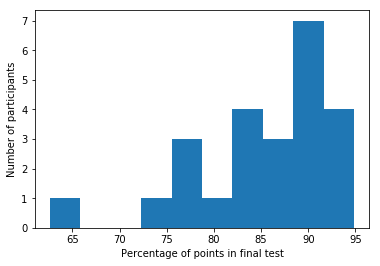

In [9]:
df_evolution['final_percent'].hist(grid=False)
plt.xlabel("Percentage of points in final test")
plt.ylabel("Number of participants")

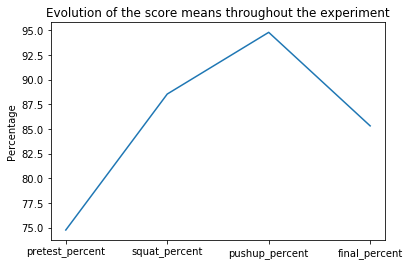

In [10]:
# Evolution of the mean
df_evolution_means = df_evolution.mean(axis=0).to_frame()
df_evolution_means.plot(legend=False)
plt.title('Evolution of the score means throughout the experiment')
plt.xticks(np.arange(len(df_evolution_means.index)), df_evolution_means.index)
_ = plt.ylabel('Percentage')
plt.show()

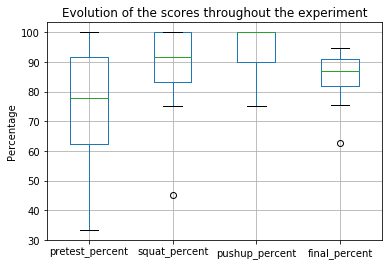

In [11]:
df_evolution.boxplot()
plt.title('Evolution of the scores throughout the experiment')
_ = plt.ylabel('Percentage')
plt.show()

#### Assess transfer learning parts

Questions with transfer learning


Question 0. Look at the following image. It shows an exercise that was not presented during the lecture. In your opinion, is this similar to one of the exercises shown during the lecture? If yes, which one? Justify your answer. Explain what are the similarities/dissimilarities with the presented exercises.

Question 5. This injury can be the consequence of incorrect elbow movement during pushups (never said in the lectures)

Question 6. Look at the following image. It shows an exercise that was not presented during the lecture. In your opinion, is this similar to one of the exercises shown during the lecture? If yes, which one? Justify your answer. Explain what are the similarities/dissimilarities with the presented exercises.

Question 8. The chaining of the Burpee explain could particularly hurt one body joint if done uncorrectly. Which joins are at risk? (never said in the lectures)

Question 10. This injury can be the consequence of incorrect elbow movement during pushups (never said in the lectures)

In [12]:
NUM_SESSIONS = 6
DATA = 'data/'
CLEAN = 'clean/'
BASE_PATH = DATA + CLEAN

def session_summary(session):
    
    df_final = pd.read_csv(BASE_PATH + 's' + str(session) + '_final.csv')
    df_final.index = df_final.id
    df_transfer_learning = df_final[['0', '5', '6', '8', '10']]
    df_final['transfer_learning_percent'] = df_transfer_learning.sum(axis=1) * 100 / len(df_transfer_learning.columns)
    df_final = df_final[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', 'transfer_learning_percent', 'percent']]
    df_final.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', 'transfer_learning_percent', 'total_percent']

    return df_final


df_final_quizz_answers = pd.DataFrame()
for s in range(NUM_SESSIONS):
    df_session = session_summary(s)
    df_final_quizz_answers = df_final_quizz_answers.append(df_session)
df_final_quizz_answers.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,transfer_learning_percent,total_percent
id,,,,,,,,,,,,,,
0,1.0,0.9,1.0,1.0,1.0,1.0,1.0,0.571429,0.833333,0.75,1.0,1.0,96.666667,92.123016


In [13]:
df_final_quizz_answers['transfer_learning_percent'].mean()

84.4027777777778

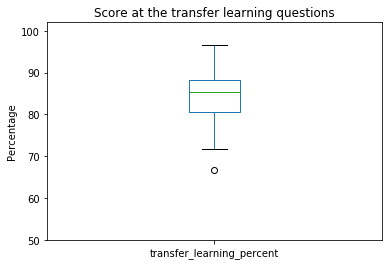

In [14]:
df_final_quizz_answers['transfer_learning_percent'].plot.box().set_ylim(50,102)
plt.title('Score at the transfer learning questions')
_ = plt.ylabel('Percentage')
plt.show()

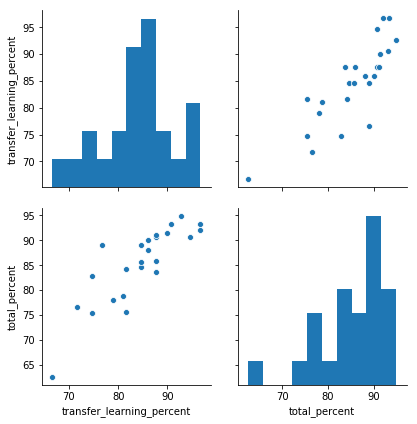

In [15]:
sns.pairplot(df_final_quizz_answers[['transfer_learning_percent', 'total_percent']], height=3)

In [16]:
pearsonr(df_final_quizz_answers['transfer_learning_percent'], df_final_quizz_answers['total_percent'])

(0.840655306603001, 2.7186502229953987e-07)

Overall, the transfer learning skills were acquired (mean of 84%). Moreover, we can see that there is a correlation between the final quizz score and the transfer learning score (the ones that had better understood the mooc (had better results) managed to do better the transfer learning part).

### Influence of previous knowledge (pretest)

In [17]:
df_pretest = df_summary.drop(['id', 'partner', 'squat_percent', 'pushup_percent'], axis=1)
df_pretest.head(1)

,pretest_percent,final_percent
id,,
1,86.111111,91.369048


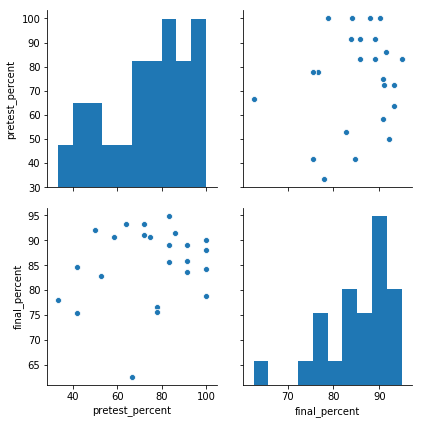

In [18]:
sns.pairplot(df_pretest, height=3)

The data is more likely not really correlated but we can chek with the pearson (linear association) and spearman coeff.

In [19]:
pearsonr(df_pretest['pretest_percent'], df_pretest['final_percent'])

(0.19365171812502202, 0.3645782939291369)

In [20]:
spearmanr(df_pretest['pretest_percent'], df_pretest['final_percent'])

SpearmanrResult(correlation=0.0664051771669015, pvalue=0.7578606570262096)

### Differences groups and individuals

In [21]:
# Get dataframe for "individial sessions" detapoints
df_summary_individual = df_summary.loc[pd.isna(df_summary['partner'])]
df_summary_individual = df_summary_individual.drop(['partner'], axis=1)

In [22]:
# Get dataframe for "groups sessions" detapoints
pd.options.mode.chained_assignment = None  # default='warn'
df_summary_groups = df_summary.loc[pd.notna(df_summary['partner'])]
df_summary_groups['partner'] = df_summary_groups['partner'].astype(int)

#### Impact on results

Means:  squat_percent     84.166667
pushup_percent    95.416667
final_percent     81.240079
dtype: float64


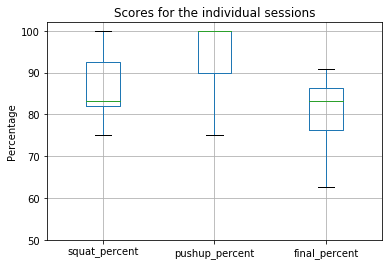

In [23]:
# Results for individual sessions
a = df_summary_individual.drop(['pretest_percent','id'], axis=1).boxplot().set_ylim(50,102)
print("Means: ", df_summary_individual.drop(['pretest_percent','id'], axis=1).mean(axis=0))
plt.title('Scores for the individual sessions')
_ = plt.ylabel('Percentage')
plt.show()

Means:  partner           13.500000
squat_percent     92.916667
pushup_percent    94.166667
final_percent     89.393188
dtype: float64


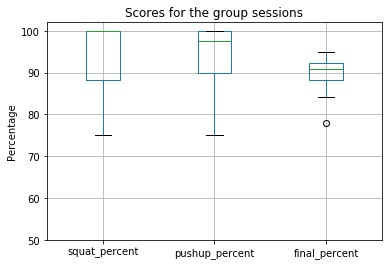

In [24]:
# Results for groups sessions
a = df_summary_groups.drop(['pretest_percent', 'id', 'partner'], axis=1).boxplot().set_ylim(50,102)
print("Means: ", df_summary_groups.drop(['pretest_percent','id'], axis=1).mean(axis=0))
plt.title('Scores for the group sessions')
_ = plt.ylabel('Percentage')

We can see that the results for the group sessions for the final quizz are higher than the individual ones (but not necessarly for the intermediate quizz). We do the t-test to verify our answer (Welch as the variance is different). We first look to see if we have a normal distribution.

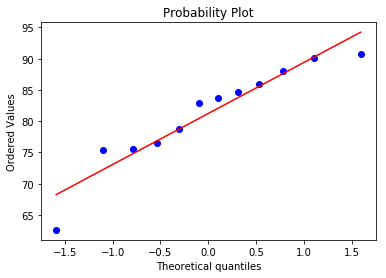

In [25]:
stats.probplot(df_summary_individual['final_percent'], dist="norm", plot=pylab)
pylab.show()

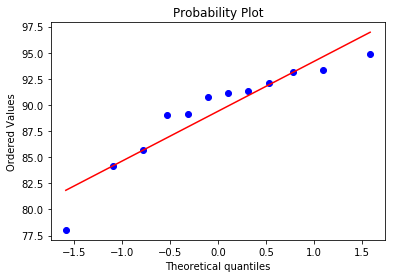

In [26]:
stats.probplot(df_summary_groups['final_percent'], dist="norm", plot=pylab)
pylab.show()

In [27]:
from scipy.stats import shapiro

In [28]:
shapiro(df_summary_individual['final_percent'])


(0.9138785600662231, 0.23915348947048187)

In [29]:
ttest_ind(df_summary_individual['final_percent'], df_summary_groups['final_percent'], equal_var=False)
# if not normal use


Ttest_indResult(statistic=-3.0492620933550216, pvalue=0.006933503506884595)

The p-value is really small so we can conclude that there is a significant difference between the two categories !

#### Agreement rate in the groups during squat and pushup quizz and impact

In [30]:
from utils_quizzes import *
from utils_sessions import *

DATA = 'data/'
CLEAN = 'clean/'
BASE_PATH = DATA + CLEAN
SESSIONS = 6

def calculate_agreement(session):
    
    answers = ['a)', 'b)', 'c)', 'd)', 'e)']
    
    df_groups = pd.read_csv(BASE_PATH + 's' + str(session) + '_groups.csv')
    df_groups.index = df_groups.id
    df_groups = df_groups[['partner']]
    # if individual session assign random partner
    while df_groups.isnull().values.any():
        pair_df = df_groups[df_groups['partner'].isnull()].sample(n=2)
        df_groups.loc[pair_df.index.values[0]] = pair_df.index.values[1]
        df_groups.loc[pair_df.index.values[1]] = pair_df.index.values[0]
        
    df_groups['partner'] = df_groups['partner'].astype(int)
    
    participant_agreement = {}
    
    for i in list(df_groups.index):
        participant_agreement[i] = -1
    
    for participant in participant_agreement.keys():
        if participant_agreement[participant] == -1:
            total_questions = 0
            agreed_questions = 0
            partner = df_groups.loc[participant][0]
            
            for quiz in ['squat', 'pushup']:
                raw_filename = DATA + str(session) + '/' + quiz + '.csv'
                df_quiz = pd.read_csv(raw_filename, encoding='utf-8', quotechar='"', sep=',', header=0,
                                      usecols=cleanup_dicts[quiz][0], names=cleanup_dicts[quiz][1])

                df_quiz.id = df_quiz.id.apply(lambda name: participants[session][name])
                df_quiz.index = df_quiz.id

                # Iterate over questions
                for q in range(len(cleanup_dicts[quiz][2])):
                    total_questions += 1
                    agreed = True
                    for answer in answers:
                        if answer in df_quiz[str(q)].loc[participant] or answer in df_quiz[str(q)].loc[partner]:
                            if not answer in df_quiz[str(q)].loc[participant] or not answer in df_quiz[str(q)].loc[partner]:
                                agreed = False
                                break
                    if agreed:
                        agreed_questions += 1
                        
            agreement = agreed_questions / total_questions * 100
            participant_agreement[participant] = agreement
            participant_agreement[partner] = agreement
            
    return participant_agreement


agreement_dict = {}
for s in range(SESSIONS):
    session_agreement_dict = calculate_agreement(s)
    agreement_dict.update(session_agreement_dict)
agreement_dict

{1: 100.0,
 2: 100.0,
 0: 100.0,
 3: 100.0,
 4: 87.5,
 5: 62.5,
 6: 62.5,
 7: 87.5,
 8: 62.5,
 9: 62.5,
 10: 62.5,
 11: 62.5,
 12: 87.5,
 13: 87.5,
 14: 87.5,
 15: 87.5,
 16: 50.0,
 17: 87.5,
 18: 50.0,
 19: 87.5,
 20: 75.0,
 21: 75.0,
 22: 87.5,
 23: 87.5}

Let's first see test the agreement rate of the groups sessions with the agreement rate for individual sessions were pairs were formed theoretically and randomly.

In [31]:
pd.options.mode.chained_assignment = None  # default='warn'
df_summary_individual['agreement_percent'] = df_summary_individual.id.map(agreement_dict)
df_summary_individual

,id,pretest_percent,squat_percent,pushup_percent,final_percent,agreement_percent
id,,,,,,
4,4,75.000000,83.333333,100.0,90.753968,87.5
5,5,41.666667,75.000000,100.0,84.623016,62.5
6,6,100.000000,45.000000,90.0,78.809524,62.5
7,7,77.777778,83.333333,100.0,76.587302,87.5
8,8,100.000000,91.666667,100.0,88.035714,62.5
9,9,91.666667,78.333333,100.0,83.730159,62.5
10,10,41.666667,95.000000,75.0,75.456349,62.5
11,11,91.666667,83.333333,100.0,85.873016,62.5
12,12,66.666667,91.666667,100.0,62.599206,87.5


In [32]:
pd.options.mode.chained_assignment = None  # default='warn'
df_summary_groups['agreement_percent'] = df_summary_groups.id.map(agreement_dict)
df_summary_groups

,id,partner,pretest_percent,squat_percent,pushup_percent,final_percent,agreement_percent
id,,,,,,,
1,1,3,86.111111,100.000000,90.0,91.369048,100.0
2,2,0,58.333333,100.000000,100.0,90.753968,100.0
0,0,2,50.000000,100.000000,100.0,92.123016,100.0
3,3,1,63.888889,100.000000,90.0,93.194444,100.0
16,16,18,33.333333,83.333333,75.0,78.035714,50.0
17,17,19,72.222222,75.000000,100.0,91.111111,87.5
18,18,16,91.666667,90.000000,90.0,89.027778,50.0
19,19,17,83.333333,100.000000,100.0,85.694444,87.5
20,20,21,100.000000,100.000000,90.0,84.146825,75.0


In [33]:
# Mean of agreement percentage for randomnly assigned pair from participants of the individual sessions
df_summary_individual['agreement_percent'].mean(axis=0)

75.0

In [34]:
# Mean of agreement percentage for group session
df_summary_groups['agreement_percent'].mean(axis=0)

83.33333333333333

In [36]:
shapiro(df_summary_individual['agreement_percent'])


(0.6497829556465149, 0.00028840036247856915)

In [37]:
shapiro(df_summary_groups['agreement_percent'])


(0.8183344602584839, 0.015256590209901333)

In [40]:
ks_2samp(df_summary_individual['agreement_percent'], df_summary_groups['agreement_percent'])


Ks_2sampResult(statistic=0.33333333333333337, pvalue=0.433308936810486)

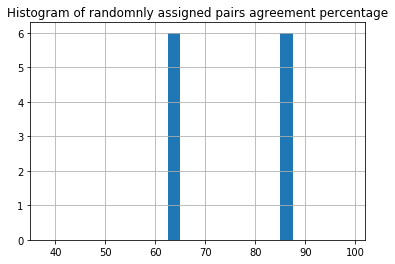

In [35]:
df_summary_individual['agreement_percent'].hist().set_xlim(35,102)
plt.title('Histogram of randomnly assigned pairs agreement percentage')
plt.show()

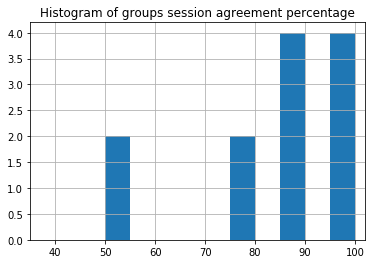

In [35]:
df_summary_groups['agreement_percent'].hist().set_xlim(35,102)
plt.title('Histogram of groups session agreement percentage')
plt.show()

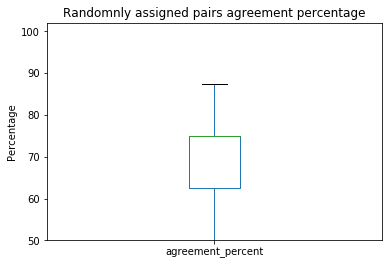

In [36]:
df_summary_individual['agreement_percent'].plot.box().set_ylim(50,102)
plt.title('Randomnly assigned pairs agreement percentage')
_ = plt.ylabel('Percentage')
plt.show()

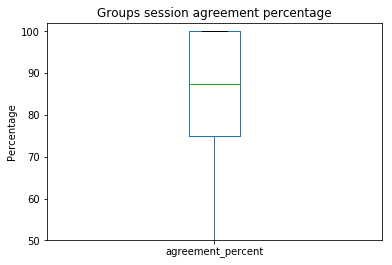

In [37]:
df_summary_groups['agreement_percent'].plot.box().set_ylim(50,102)
plt.title('Groups session agreement percentage')
_ = plt.ylabel('Percentage')
plt.show()

We can see there is a difference. This was done with several random pairs and the results obtained were similar.

Next, for the group sessions, let's see plot the agreement percentage and the respective final quizz percentage of the participants.

In [38]:
groups = {1: 0, 3: 0,
          2: 1, 0: 1,
          16: 2, 18: 2,
          17: 3, 19: 3,
          20: 4, 21: 4,
          22: 5, 23: 5}
df_summary_groups['groups'] = df_summary_groups.id.map(groups)

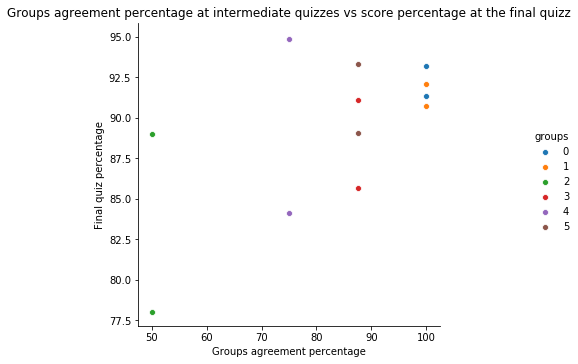

In [39]:
sns.pairplot(x_vars=["agreement_percent"], y_vars=["final_percent"], data=df_summary_groups, hue='groups', height=5)
plt.title('Groups agreement percentage at intermediate quizzes vs score percentage at the final quizz')
_ = plt.ylabel('Final quiz percentage')
_ = plt.xlabel('Groups agreement percentage')

If we look at the scatter plot, we see that when the agreement percent of the intermediate quizz in the pair is low, the two participants tend to have bigger difference in their final score quizz. This could be due to the fact that the peers who agreed the most were in fact communicating more about the answers and were therefore able to better understand the moocs and also their mistakes at the intermediate quizzes. Moreover, it also has an impact in a pair in the lowest score of the two participants (the worst score is quite good when the agreement percent is high).

In [40]:
groups = df_summary_groups.sort_values('groups').groupby('groups')
difference_in_pairs = {}
for k, g in groups:
    difference_in_pairs[g['groups'].iloc[0]] = np.abs(g['final_percent'].iloc[0] - g['final_percent'].iloc[1])
difference_in_pairs

{0: 1.8253968253968225,
 1: 1.3690476190476488,
 2: 10.992063492063508,
 3: 5.416666666666686,
 4: 10.714285714285737,
 5: 4.226190476190482}